## Handwritten Image Detection with Keras using MNIST and Fashion MNIST data

In this exercise we will work with image data: specifically the famous MNIST and Fashion MNIST data sets.  MNIST data set contains 70,000 images of handwritten digits in grayscale (0=black, 255 = white). Fashion MNIST data set contains 70,000 images of clothing in grayscale (0=black, 255 = white). All the images are 28 pixels by 28 pixels for a total of 784 pixels.  This is quite small by image standards.  Also, the images are well centered and isolated.  This makes this problem solvable with standard fully connected neural nets without too much pre-work. <br><br>
We will use a Convolutional Neural Network and compare it with a linear neural network. 

In the first part of this notebook, we will walk you through loading in the data, building a network, and training it.  Then it will be your turn to try different models and see if you can improve performance

In [40]:
# Preliminaries

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Conv3D
from keras.optimizers import RMSprop
from keras.datasets import fashion_mnist

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's explore the dataset a little bit

In [2]:
# Load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
#Let's just look at a particular example to see what is inside

x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

In [5]:
# What is the corresponding label in the training set?
y_train[333]

8

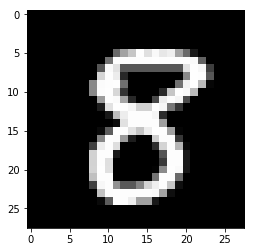

In [6]:
# Let's see what this image actually looks like

plt.imshow(x_train[333], cmap='Greys_r')

In [7]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [8]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255


In [9]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [10]:
# We will build a model with two hidden layers of size 512
# Fully connected inputs at each layer
# We will use dropout of .2 to help regularize
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
## Note that this model has a LOT of parameters
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Let's compile the model
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization 
# of the loss function we had in binary classification case, to multi class case

In [13]:
# And now let's fit.

batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 37us/step - loss: 0.5030 - acc: 0.8480 - val_loss: 0.2078 - val_acc: 0.9340
Epoch 2/30
60000/60000 [==============================] - 2s 29us/step - loss: 0.2524 - acc: 0.9254 - val_loss: 0.1531 - val_acc: 0.9536
Epoch 3/30
60000/60000 [==============================] - 2s 30us/step - loss: 0.1957 - acc: 0.9428 - val_loss: 0.1271 - val_acc: 0.9616
Epoch 4/30
60000/60000 [==============================] - 2s 29us/step - loss: 0.1697 - acc: 0.9500 - val_loss: 0.1156 - val_acc: 0.9660
Epoch 5/30
60000/60000 [==============================] - 2s 29us/step - loss: 0.1542 - acc: 0.9556 - val_loss: 0.1082 - val_acc: 0.9685
Epoch 6/30
60000/60000 [==============================] - 2s 29us/step - loss: 0.1415 - acc: 0.9586 - val_loss: 0.1028 - val_acc: 0.9689
Epoch 7/30
60000/60000 [==============================] - 2s 29us/step - loss: 0

In [14]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10552346733190643
Test accuracy: 0.9752


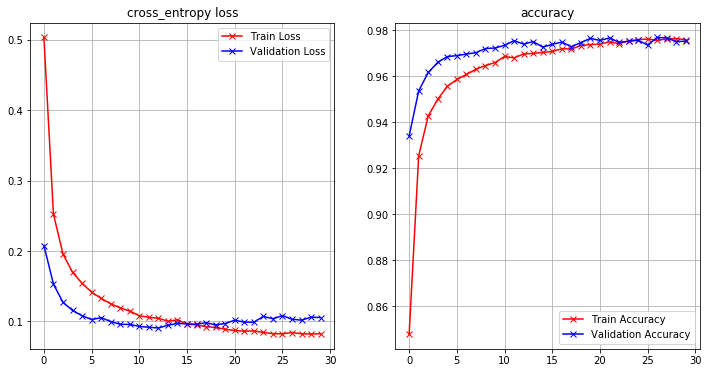

In [15]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["acc"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_acc"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

This is reasonably good performance, but we can do even better!  Next you will build an even bigger network and compare the performance.

## Exercise
### Your Turn: Build your own model
Use the Keras "Sequential" functionality to build a convolutional neural network `model_2` with the following specifications:
<br>
<br>
Model Architecture:<br>
We will build the famous LeNet architecutre and measure its performance.
<br>
    Convolution -> Relu -> Max pooling -> Convolution -> Relu -> Max pooling -> FC1 -> Relu -> FC2 -> Output(SoftMax)
<br>

1. Convolution 1 kernel size: 5(H) x 5(W) x 6(filters), stride = 1, no padding
2. Max pooling 1 kernel size: 2(H) x 2(W), stride = 2
3. Convolution 2 kernel size: 5(H) x 5(W) x 16(filters), stride = 1, no padding
4. Max pooling 2 kernel size: 2(H) x 2(W), stride = 2
5. FC1 size: 120
6. FC2 size: 84
7. How many parameters does your model have?  How does it compare with the previous model?
8. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

To use the LeNet model, we need to do some preprocessing of the data first.

In [16]:
# Data is currently flattened i.e. m X 784, we need to reshape it back to 28 * 28. To do that we reshape the data.

x_train = np.reshape(x_train, [-1, 28, 28])
x_test = np.reshape(x_test, [-1, 28, 28])
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [17]:
# LeNet requires input of 32 X 32. So, we will pad the train and test images with zeros to increase the size to 32 X 32.

x_train=np.pad(x_train, ((0,0), (2,2), (2, 2)), 'constant')
x_test=np.pad(x_test, ((0,0), (2,2), (2, 2)), 'constant')
x_train.shape, x_test.shape

((60000, 32, 32), (10000, 32, 32))

In [18]:
# Convolutional model requires input to be of 3 dimensions. We will add a channel dimension to it.

x_train = np.reshape(x_train, [-1, 32, 32, 1])
x_test = np.reshape(x_test, [-1, 32, 32, 1])
x_train.shape, x_test.shape

((60000, 32, 32, 1), (10000, 32, 32, 1))

Write your model below

In [19]:
model_2 = Sequential() 
model_2.add(Conv2D(6,kernel_size=(5,5),strides=(1,1),activation="relu"))
model_2.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model_2.add(Conv2D(16,kernel_size=(5,5),strides=(1,1),activation="relu"))
model_2.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model_2.add(Flatten())


#FC1 and FC2 layers
model_2.add(Dense(120,activation="relu"))
model_2.add(Dense(84,activation="relu"))

#Final Softmax layer
model_2.add(Dense(10,activation="softmax"))

model_2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=.001),
              metrics=['accuracy'])

history2 = model_2.fit(
    x_train, y_train,
    batch_size=128,
    epochs=20,
    verbose=1,
    validation_data=(x_test, y_test))

model_2.summary()


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 38s 642us/step - loss: 0.2895 - acc: 0.9118 - val_loss: 0.0780 - val_acc: 0.9734
Epoch 2/20
60000/60000 [==============================] - 38s 632us/step - loss: 0.0788 - acc: 0.9759 - val_loss: 0.0615 - val_acc: 0.9791
Epoch 3/20
60000/60000 [==============================] - 38s 633us/step - loss: 0.0536 - acc: 0.9837 - val_loss: 0.0458 - val_acc: 0.9845
Epoch 4/20
60000/60000 [==============================] - 38s 633us/step - loss: 0.0407 - acc: 0.9867 - val_loss: 0.0394 - val_acc: 0.9866
Epoch 5/20
60000/60000 [==============================] - 38s 633us/step - loss: 0.0328 - acc: 0.9891 - val_loss: 0.0387 - val_acc: 0.9871
Epoch 6/20
60000/60000 [==============================] - 38s 636us/step - loss: 0.0276 - acc: 0.9915 - val_loss: 0.0357 - val_acc: 0.9882
Epoch 7/20
60000/60000 [==============================] - 38s 634us/step - loss: 0.0241 - acc: 0.9921 - val_loss: 0.

Test loss: 0.044815872876554065
Test accuracy: 0.9903


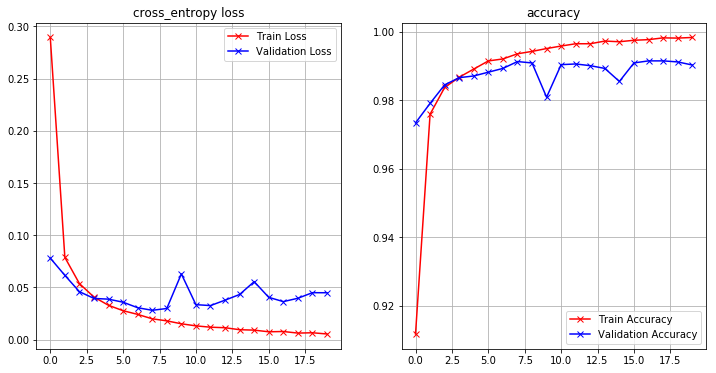

In [20]:
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plot_loss_accuracy(history2)


## Think about the following questions

1) How do model_1 and model_2 compare?  Which do you prefer?  If you were going to put one into production, which would you choose and why?

2) Compare the trajectories of the loss function on the training set and test set for each model?  How do they compare?  What does that suggest about each model?  Do the same for accuracy?  Which do you think is more meaningful, the loss or the accuracy?

3) Suggest an improvement to the second model (changing structure, learning rate, number of epochs, etc.) that you think will result in a better model or a smaller model with same performance.  Try it out below?  Did it improve the performance? 

In [ ]:
# 1) model_2 is better, and would be selected for production as it has a lower
#    test loss and a higher test accuracy. 

# 2) The trajectories are similar for both, but the validation graph for model 2 
#    has sudden sudden deflections in it.

# 3) Below is the model trained with a learning rate of .005 on 10 epochs. While
#     the test loss is higher, the accuracy is close to the last model, and well
#     over 70%


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 39s 644us/step - loss: 0.1100 - acc: 0.9777 - val_loss: 0.0467 - val_acc: 0.9859
Epoch 2/10
60000/60000 [==============================] - 38s 631us/step - loss: 0.0512 - acc: 0.9852 - val_loss: 0.0613 - val_acc: 0.9837
Epoch 3/10
60000/60000 [==============================] - 37s 623us/step - loss: 0.0442 - acc: 0.9875 - val_loss: 0.0564 - val_acc: 0.9858
Epoch 4/10
60000/60000 [==============================] - 38s 625us/step - loss: 0.0405 - acc: 0.9887 - val_loss: 0.0507 - val_acc: 0.9880
Epoch 5/10
60000/60000 [==============================] - 37s 619us/step - loss: 0.0371 - acc: 0.9900 - val_loss: 0.0904 - val_acc: 0.9811
Epoch 6/10
60000/60000 [==============================] - 37s 619us/step - loss: 0.0380 - acc: 0.9903 - val_loss: 0.0453 - val_acc: 0.9901
Epoch 7/10
60000/60000 [==============================] - 37s 624us/step - loss: 0.0335 - acc: 0.9920 - val_loss: 0.

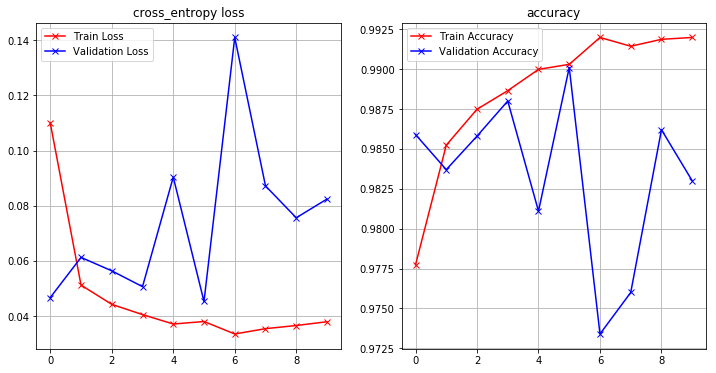

In [21]:
model_2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=.005),
              metrics=['accuracy'])

history3 = model_2.fit(
    x_train, y_train,
    batch_size=128,
    epochs=10,
    verbose=1,
    validation_data=(x_test, y_test))

score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plot_loss_accuracy(history3)
